=== RAINFALL ANALYSIS ===
Total records: 181
Total rainfall: 3245.0 mm
Average daily: 17.9 mm
Max daily: 31.0 mm
Rainy days: 181

=== MONTHLY TOTALS ===
month
1    536
2    504
3    571
4    540
5    545
6    549
Name: rainfall_mm, dtype: int64


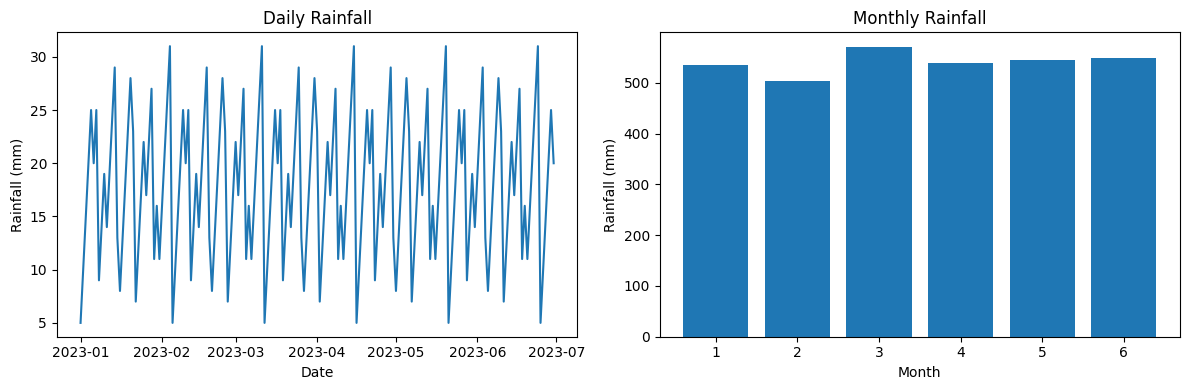

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


def create_data():
    dates = pd.date_range('2023-01-01', '2023-06-30', freq='D')
    rainfall = [max(0, 5 + 3*(i%7) + 2*(i%5)) for i in range(len(dates))]

    df = pd.DataFrame({
        'date': dates,
        'rainfall_mm': rainfall
    })
    return df

df = create_data()

print("=== RAINFALL ANALYSIS ===")
print(f"Total records: {len(df)}")
print(f"Total rainfall: {df['rainfall_mm'].sum():.1f} mm")
print(f"Average daily: {df['rainfall_mm'].mean():.1f} mm")
print(f"Max daily: {df['rainfall_mm'].max():.1f} mm")
print(f"Rainy days: {(df['rainfall_mm'] > 0).sum()}")

df['month'] = df['date'].dt.month
monthly = df.groupby('month')['rainfall_mm'].sum()
print("\n=== MONTHLY TOTALS ===")
print(monthly)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(df['date'], df['rainfall_mm'])
plt.title('Daily Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')

plt.subplot(1, 2, 2)
plt.bar(monthly.index, monthly.values)
plt.title('Monthly Rainfall')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')

plt.tight_layout()
plt.show()
